<a href="https://colab.research.google.com/github/Divyasri-062008/CODSOFT/blob/main/TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
# Load the dataset
df = pd.read_csv('IMDb_Movies_India.csv', encoding='latin-1')

# Display the first few rows of the dataset
print(df.head())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64
            Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000


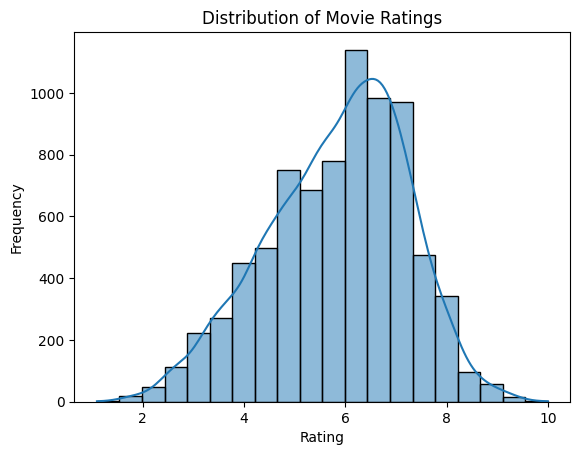

In [9]:
# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

# Visualize the distribution of ratings
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [12]:
# Fill missing values or drop them
df.dropna(inplace=True)  # or df.fillna(method='ffill', inplace=True)

# Check the relevant categorical features in the dataset
# Assuming 'Genre', 'Director', and 'Actors' are the categorical features
categorical_features = ['Genre', 'Director', 'Actor 1','Actor 2','Actor 3']  # Adjust based on the actual column names in the dataset
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Separate features and target variable
X = df.drop('Rating', axis=1)  # Features
y = df['Rating']  # Target variable

In [13]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Check the data types of the features
print(X_train.dtypes)




Name                       object
Year                       object
Duration                   object
Votes                      object
Genre_Action, Adventure      bool
                            ...  
Actor 3_Zeeshan Khan         bool
Actor 3_Zeishan Quadri       bool
Actor 3_Zenobia Shroff       bool
Actor 3_Zoya Hussain         bool
Actor 3_Zulfi Sayed          bool
Length: 9643, dtype: object


In [26]:
# Convert Year to numeric (assuming it's in a suitable format)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Convert Duration to numeric (assuming it is in minutes)
df['Duration'] = df['Duration'].str.replace(' min', '').astype(int)

# Convert Votes to numeric
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

# Drop the Name column
df = df.drop(columns=['Name'])

# Check for missing values
print(df.isnull().sum())

Year                       5659
Duration                      0
Rating                        0
Votes                      1368
Genre_Action, Adventure       0
                           ... 
Actor 3_Zeeshan Khan          0
Actor 3_Zeishan Quadri        0
Actor 3_Zenobia Shroff        0
Actor 3_Zoya Hussain          0
Actor 3_Zulfi Sayed           0
Length: 9643, dtype: int64


In [30]:
# Instead of:
# df = pd.get_dummies(df, columns=['Genre', 'Director'], drop_first=True)

# Check if 'Genre' and 'Director' are in the columns before applying get_dummies:
categorical_features = ['Genre', 'Director']
features_to_encode = [f for f in categorical_features if f in df.columns]

# Only apply get_dummies to the features that are present:
if features_to_encode:
    df = pd.get_dummies(df, columns=features_to_encode, drop_first=True)
else:
    print("Genre and/or Director columns have already been encoded or are not present in the DataFrame.")

Genre and/or Director columns have already been encoded or are not present in the DataFrame.


In [32]:
# Assuming 'Rating' is the target variable
X = df.drop(columns=['Rating'])  # Features
y = df['Rating']  # Target variable

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Fit the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 1.6225541978798588
R^2 Score: 0.1237695340443925


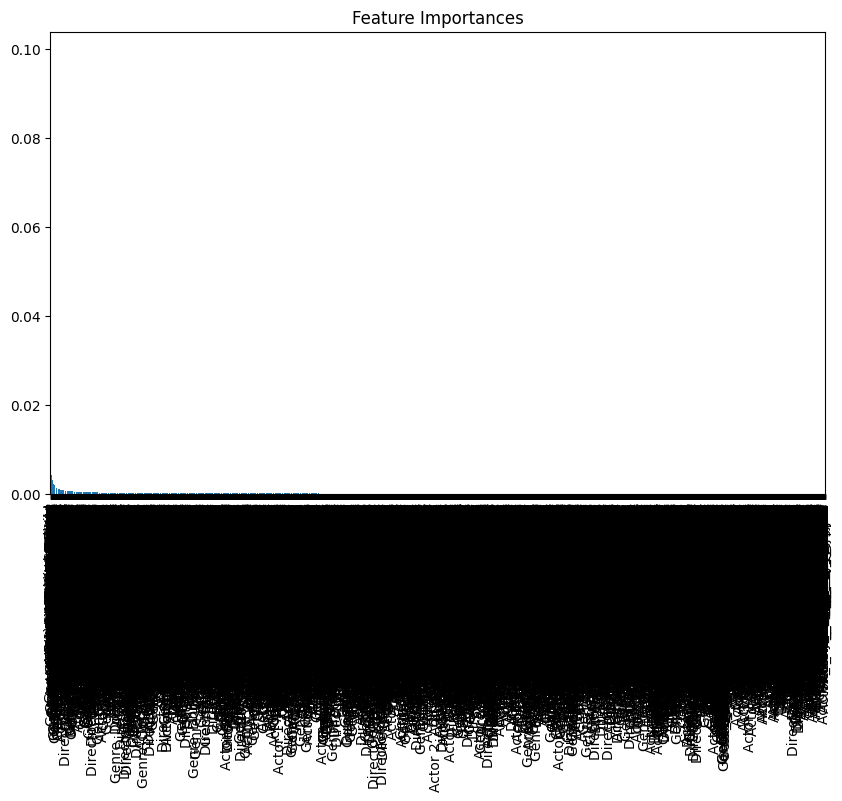

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()
